## <b> Objective </b> : To identify the defaulters and present a better model to predict on customers who can actually pay loan on given time.

In [194]:
# Importing the important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
# Reading the .csv file

data=pd.read_csv('C:/Users/vinay/Desktop/Flip_Robo_Project_Assignments/Micro_Credit_Project/data.csv')
data.sample(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
1978          1979      1  01038I83938   335.0     49.000000     49.000000   
132743      132744      1  22982I90586  2072.0    517.237333    517.280000   
204944      204945      1  11357I89232   238.0     83.585333     83.585333   
112959      112960      1  85661I89231  1311.0  61861.000000  64121.550000   
194318      194319      1  46148I85340   934.0   2400.000000   2760.000000   
106035      106036      1  00023I90586   119.0  15103.766000  15308.660000   
157425      157426      1  56031I89235   200.0     45.720000     45.720000   
23626        23627      1  57973I88659  1309.0  10150.000000  12696.000000   
185904      185905      1  20684I90840   915.0   6776.466667   6783.000000   
130778      130779      1  62908I88659  1370.0   7209.436667   7236.310000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
1978      579.00    579.00           1.000000                0.0  ...   
132743      0.00      0.00          34.000000               34.0  ...   
204944    900.68    900.68           1.000000                0.0  ...   
112959  12051.16  13057.24      646984.733059                0.0  ...   
194318    199.12    228.22          14.000000                0.0  ...   
106035  10952.01  14307.03           1.000000                0.0  ...   
157425   1224.00   1224.00          11.000000                0.0  ...   
23626   12639.35  16541.18          17.000000                0.0  ...   
185904    249.91    249.91          12.000000                0.0  ...   
130778  10474.20  15095.40           8.000000                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1978                6.0                 0.0          2.0            12   
132743              6.0                 0.0          1.0             6   
204944              6.0                 0.0          8.0            48   
112959              0.0                 0.0          0.0             0   
194318              6.0                 0.0          3.0            18   
106035              6.0                 0.0          4.0            24   
157425              6.0                 0.0          3.0            18   
23626               0.0                 0.0          0.0             0   
185904              6.0                 0.0          1.0             6   
130778             12.0                 0.0          7.0            48   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1978                  6                 0.0   1.000000   1.000000      UPW   
132743                6                 0.0   0.000000   0.000000      UPW   
204944                6                 0.0   3.142857   3.142857      UPW   
112959                0                 0.0   0.000000   0.000000      UPW   
194318                6                 0.0   0.000000   4.500000      UPW   
106035                6                 0.0   1.000000   1.000000      UPW   
157425                6                 0.0   3.000000   3.000000      UPW   
23626                 0                 0.0   0.000000   0.000000      UPW   
185904                6                 0.0   0.000000   0.000000      UPW   
130778               12                 0.0   5.750000   5.833333      UPW   

             pdate  
1978    2016-06-30  
132743  2016-07-01  
204944  2016-06-22  
112959  2016-08-06  
194318  2016-08-02  
106035  2016-07-27  
157425  2016-06-20  
23626   2016-08-05  
185904  2016-07-28  
130778  2016-07-20  

[10 rows x 37 columns]

In [196]:
# checking the column details

data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## Checking the target variable 'Label' from dataframe

In [197]:
data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

Unbalanced data

In [198]:
data_defaulter=data[data.label==0]
data_defaulter.sample(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
14771        14772      0  48735I85340   493.0   2600.000000   2600.000000   
103218      103219      0  79413I90584   997.0     -2.000000     -2.000000   
116609      116610      0  09157I70375   478.0      7.466667      7.466667   
136065      136066      0  06709I85328  1518.0   2800.000000   2800.000000   
164694      164695      0  81941I89236  1028.0      0.000000      0.000000   
124649      124650      0  62444I90586   195.0      9.833333      9.833333   
107192      107193      0  88933I90840   326.0      6.500000      6.500000   
157082      157083      0  64406I90844   253.0     50.880000     50.880000   
197663      197664      0  27130I89235   143.0    900.000000    900.000000   
45807        45808      0  41033I84453  2011.0    994.500000    995.000000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
14771   15229.77  17043.75                2.0                0.0  ...   
103218   4982.70   4982.70                0.0                0.0  ...   
116609   1076.48   1076.48                3.0                0.0  ...   
136065  15469.32  17360.82                2.0                0.0  ...   
164694      0.00      0.00                0.0                0.0  ...   
124649   2811.00   2811.00                4.0                0.0  ...   
107192     29.10     29.10                2.0                0.0  ...   
157082   -150.96   -150.96                0.0                0.0  ...   
197663   1350.37   2547.68                0.0                0.0  ...   
45807      58.00     60.00                3.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
14771               6.0                 0.0          2.0            12   
103218              6.0                 0.0          1.0             6   
116609              6.0                 0.0          1.0             6   
136065              6.0                 0.0          2.0            12   
164694              6.0                 0.0          1.0             6   
124649              6.0                 0.0          2.0            12   
107192              6.0                 0.0          1.0             6   
157082              6.0                 0.0          1.0             6   
197663              6.0                 0.0          1.0             6   
45807               6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
14771                 6                 0.0        0.0        0.0      UPW   
103218                6                 0.0        0.0        0.0      UPW   
116609                6                 0.0        0.0        0.0      UPW   
136065                6                 0.0        0.0        0.0      UPW   
164694                6                 0.0        0.0        0.0      UPW   
124649                6                 0.0        0.0        0.0      UPW   
107192                6                 0.0        0.0        0.0      UPW   
157082                6                 0.0        0.0        0.0      UPW   
197663                6                 0.0        0.0        0.0      UPW   
45807                 6                 0.0        0.0        0.0      UPW   

             pdate  
14771   2016-07-14  
103218  2016-06-30  
116609  2016-06-16  
136065  2016-07-15  
164694  2016-06-10  
124649  2016-06-25  
107192  2016-06-30  
157082  2016-06-12  
197663  2016-07-17  
45807   2016-07-01  

[10 rows x 37 columns]

In [199]:
data_defaulter.describe()

Unnamed: 0    label            aon   daily_decr30   daily_decr90  \
count   26162.000000  26162.0   26162.000000   26162.000000   26162.000000   
mean   104732.412316      0.0    8870.998799    1272.376756    1278.817736   
std     60636.167540      0.0   79707.888724    3167.434293    3181.302208   
min         1.000000      0.0     -48.000000     -18.378000     -18.378000   
25%     52388.000000      0.0     171.000000       0.533333       0.566667   
50%    104429.000000      0.0     399.000000      33.447500      35.195000   
75%    157855.250000      0.0     823.000000    1117.273750    1125.887500   
max    209585.000000      0.0  995148.346759  103764.858667  103884.610000   

           rental30      rental90  last_rech_date_ma  last_rech_date_da  \
count  26162.000000  26162.000000       26162.000000       26162.000000   
mean    2029.914812   2329.486376        3223.694134        3470.381002   
std     3756.422682   4352.824562       49421.872120       51637.471409   
min    -5686.030000  -6422.260000         -28.000000           0.000000   
25%       67.422500     78.000000           0.000000           0.000000   
50%      591.620000    659.940000           3.000000           0.000000   
75%     2307.932500   2619.697500          11.000000           0.000000   
max    74214.440000  91595.720000      997676.760075      999171.809410   

       last_rech_amt_ma  ...   cnt_loans30  amnt_loans30  maxamnt_loans30  \
count       26162.00000  ...  26162.000000  26162.000000     26162.000000   
mean         1237.04583  ...      1.431313      8.873634       271.873754   
std          2078.08958  ...      1.100109      7.213658      4258.032852   
min             0.00000  ...      1.000000      6.000000         6.000000   
25%             0.00000  ...      1.000000      6.000000         6.000000   
50%           770.00000  ...      1.000000      6.000000         6.000000   
75%          1539.00000  ...      1.000000      6.000000         6.000000   
max         55000.00000  ...     26.000000    156.000000     99571.106262   

       medianamnt_loans30   cnt_loans90  amnt_loans90  maxamnt_loans90  \
count        26162.000000  26162.000000  26162.000000     26162.000000   
mean             0.028285     15.703549      9.642382         6.234386   
std              0.152583    219.017386      8.976451         1.162510   
min              0.000000      1.000000      6.000000         6.000000   
25%              0.000000      1.000000      6.000000         6.000000   
50%              0.000000      1.000000      6.000000         6.000000   
75%              0.000000      2.000000     12.000000         6.000000   
max              1.000000   4894.101713    156.000000        12.000000   

       medianamnt_loans90     payback30     payback90  
count        26162.000000  26162.000000  26162.000000  
mean             0.027081      2.270777      2.979047  
std              0.148584      9.913831     11.459450  
min              0.000000      0.000000      0.000000  
25%              0.000000      0.000000      0.000000  
50%              0.000000      0.000000      0.000000  
75%              0.000000      0.000000      0.000000  
max              1.000000    158.000000    158.000000  

[8 rows x 34 columns]

<b>Observations </b> :

1. Columns : aon, daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma is having outliers representing 'min' value as -ve, wich is not possible.

2. Data in column aon ,	last_rech_date_ma,last_rech_date_da, maxamnt_loans30, cnt_loans90 is highly right skewed with median > mean value.

3. These column data is having exceptionaly high max values as well such as aon : 995148 , which is a clear sign of outlier.

------

## Working on attribute\input column values 

<h3>Finding the outliers in the dataframe :</h3>

In [200]:
# Checking the statistic value of the given columns

data.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

<b>Observations </b>:

- columns : aon, daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma is having outliers representing 'min' value as -ve, wich is not possible.

- data in column aon , last_rech_date_ma,last_rech_date_da, maxamnt_loans30, cnt_loans90 is highly right skewed with median > mean value.

- These column data is having exceptionaly high max values as well such as aon : 995148 , which is a clear sign of outlier.

<b> Taking 'aon' : age on cellular network in days to begin with

In [201]:
# checking for outliers 

a=data.aon
for i in a:
    if i<0:
        print ('Outlier where age is Less than 0  : ',i)
    

Outlier where age is Less than 0  :  -42.0
Outlier where age is Less than 0  :  -36.0
Outlier where age is Less than 0  :  -37.0
Outlier where age is Less than 0  :  -36.0
Outlier where age is Less than 0  :  -35.0
Outlier where age is Less than 0  :  -16.0
Outlier where age is Less than 0  :  -35.0
Outlier where age is Less than 0  :  -33.0
Outlier where age is Less than 0  :  -4.0
Outlier where age is Less than 0  :  -38.0
Outlier where age is Less than 0  :  -23.0
Outlier where age is Less than 0  :  -35.0
Outlier where age is Less than 0  :  -44.0
Outlier where age is Less than 0  :  -23.0
Outlier where age is Less than 0  :  -9.0
Outlier where age is Less than 0  :  -43.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -35.0
Outlier where age is Less than 0  :  -40.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -45.0
Outlier where age is Less than 0  :  -42.0
Outlier where

Outlier where age is Less than 0  :  -40.0
Outlier where age is Less than 0  :  -1.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -40.0
Outlier where age is Less than 0  :  -16.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -3.0
Outlier where age is Less than 0  :  -44.0
Outlier where age is Less than 0  :  -19.0
Outlier where age is Less than 0  :  -7.0
Outlier where age is Less than 0  :  -20.0
Outlier where age is Less than 0  :  -3.0
Outlier where age is Less than 0  :  -23.0
Outlier where age is Less than 0  :  -32.0
Outlier where age is Less than 0  :  -19.0
Outlier where age is Less than 0  :  -1.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -41.0
Outlier where age is Less than 0  :  -8.0
Outlier where age is Less than 0  :  -47.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -30.0
Outlier where age is Less than 0  :  -23.0
Outlier where age

Outlier where age is Less than 0  :  -33.0
Outlier where age is Less than 0  :  -17.0
Outlier where age is Less than 0  :  -37.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -7.0
Outlier where age is Less than 0  :  -28.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -44.0
Outlier where age is Less than 0  :  -41.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -36.0
Outlier where age is Less than 0  :  -46.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -15.0
Outlier where age is Less than 0  :  -16.0
Outlier where age is Less than 0  :  -48.0
Outlier where age is Less than 0  :  -29.0
Outlier where age is Less than 0  :  -42.0
Outlier where age is Less than 0  :  -35.0
Outlier where age is Less than 0  :  -47.0
Outlier where age is Less than 0  :  -41.0
Outlier where age is Less than 0  :  -37.0
Outlier where age is Less than 0  :  -47.0
Outlier wher

{'whiskers': [<matplotlib.lines.Line2D at 0x1a49d79ec40>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4143f0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a487b49b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4143f0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4143f03d0>],
 'means': []}

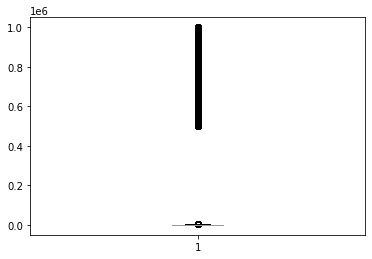

In [202]:
plt.boxplot(x=data['aon'])

In [203]:
data.aon.max()

999860.755167902

In [204]:
# converting max days into years

data.aon.max()/365   # an outlier

2739.344534706581

In [205]:
# converting the Age on cellular network into years

data_new=data.aon/365
data_new

0         0.745205
1         1.950685
2         1.465753
3         0.660274
4         2.594521
            ...   
209588    1.106849
209589    2.945205
209590    2.775342
209591    4.745205
209592    4.331507
Name: aon, Length: 209593, dtype: float64

In [206]:
# Assiging the data_new value to aon column in dataframe
data.aon=data_new

In [207]:
data.sample(10)

Unnamed: 0  label       msisdn          aon  daily_decr30  \
53404        53405      1  66698I85329     2.624658   1415.534667   
86146        86147      1  37252I82733     0.306849      1.866667   
203194      203195      1  42455I90580     3.342466    513.860000   
167204      167205      0  20441I70782     0.339726   1086.250667   
70831        70832      1  27055I90587     1.254795   9374.000000   
134500      134501      0  14261I70781     1.690411    500.000000   
95598        95599      0  53129I89235     2.865753    650.000000   
122228      122229      1  03942I70372  1575.888211   7815.000000   
38990        38991      1  07559I84452     2.115068      5.713333   
204819      204820      1  56040I88649     3.358904  11436.154667   

        daily_decr90  rental30  rental90  last_rech_date_ma  \
53404    1425.120000   8980.40  10045.88               12.0   
86146       1.866667   1406.32   1406.32                1.0   
203194    515.400000   1368.90   1521.00               12.0   
167204   1093.418667    344.15    433.05               11.0   
70831   12896.400000   3891.13   4520.96                1.0   
134500    500.000000   4330.21   5648.10                0.0   
95598     650.000000      0.00      0.00                0.0   
122228  10201.170000    600.39   1040.52                8.0   
38990       5.713333    382.96    382.96                0.0   
204819  11502.790000   1700.89   2146.37                3.0   

        last_rech_date_da  ...  maxamnt_loans30  medianamnt_loans30  \
53404            0.000000  ...              6.0                 0.0   
86146            0.000000  ...              6.0                 0.0   
203194           0.000000  ...              6.0                 0.0   
167204           0.000000  ...              6.0                 0.0   
70831            0.000000  ...             12.0                 0.0   
134500           0.000000  ...              6.0                 0.0   
95598            0.000000  ...              6.0                 0.0   
122228           0.000000  ...              6.0                 0.0   
38990            0.000000  ...              6.0                 0.0   
204819      517204.586999  ...              6.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
53404           1.0             6                6                 0.0   
86146           1.0             6                6                 0.0   
203194          1.0             6                6                 0.0   
167204          1.0             6                6                 0.0   
70831           4.0            42               12                 0.0   
134500          1.0             6                6                 0.0   
95598           1.0             6                6                 0.0   
122228         11.0            66                6                 1.0   
38990           1.0             6                6                 0.0   
204819          5.0            30                6                 0.0   

        payback30  payback90  pcircle       pdate  
53404         0.0   0.000000      UPW  2016-07-13  
86146         0.0   0.000000      UPW  2016-06-08  
203194        0.0   0.000000      UPW  2016-07-03  
167204        0.0   0.000000      UPW  2016-07-23  
70831        14.0  10.333333      UPW  2016-08-02  
134500        0.0   0.000000      UPW  2016-07-07  
95598         0.0   0.000000      UPW  2016-07-20  
122228        7.0   4.700000      UPW  2016-08-12  
38990         0.0   0.000000      UPW  2016-06-02  
204819        1.5   1.750000      UPW  2016-07-14  

[10 rows x 37 columns]

In [208]:
# value more that 40

b=data.aon>40
b.value_counts()

# 2089 outliers

False    207504
True       2089
Name: aon, dtype: int64

In [209]:
# less than 0 age value

c=data.aon<0
c.value_counts()

# 1539 outliers

False    208054
True       1539
Name: aon, dtype: int64

Obeservations :
- b is having outliers more than expected Maximum value.
- c is having less than 0 data

In [210]:
#removing the 2089 outliers from dataframe found variable b

data=data[data.aon<40]
data

Unnamed: 0  label       msisdn       aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789  0.745205   3055.050000   3065.150000   
1                2      1  76462I70374  1.950685  12122.000000  12124.750000   
2                3      1  17943I70372  1.465753   1398.000000   1398.000000   
3                4      1  55773I70781  0.660274     21.228000     21.228000   
4                5      1  03813I82730  2.594521    150.619333    150.619333   
...            ...    ...          ...       ...           ...           ...   
209588      209589      1  22758I85348  1.106849    151.872333    151.872333   
209589      209590      1  95583I84455  2.945205     36.936000     36.936000   
209590      209591      1  28556I85350  2.775342  11843.111667  11904.350000   
209591      209592      1  59712I82733  4.745205  12488.228333  12574.370000   
209592      209593      1  65061I85339  4.331507   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[207504 rows x 37 columns]

In [211]:
b_new=data.aon>40
b_new.value_counts()

False    207504
Name: aon, dtype: int64

In [212]:
data=data[data.aon>0]
data

Unnamed: 0  label       msisdn       aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789  0.745205   3055.050000   3065.150000   
1                2      1  76462I70374  1.950685  12122.000000  12124.750000   
2                3      1  17943I70372  1.465753   1398.000000   1398.000000   
3                4      1  55773I70781  0.660274     21.228000     21.228000   
4                5      1  03813I82730  2.594521    150.619333    150.619333   
...            ...    ...          ...       ...           ...           ...   
209588      209589      1  22758I85348  1.106849    151.872333    151.872333   
209589      209590      1  95583I84455  2.945205     36.936000     36.936000   
209590      209591      1  28556I85350  2.775342  11843.111667  11904.350000   
209591      209592      1  59712I82733  4.745205  12488.228333  12574.370000   
209592      209593      1  65061I85339  4.331507   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[205965 rows x 37 columns]

In [213]:
c_new=data.aon<0
c_new.value_counts()

False    205965
Name: aon, dtype: int64

In [214]:
data.describe()

Unnamed: 0         label            aon   daily_decr30  \
count  205965.000000  205965.00000  205965.000000  205965.000000   
mean   104796.929808       0.87678       1.808779    5418.970439   
std     60500.290569       0.32869       1.363652    9234.919007   
min         1.000000       0.00000       0.002740     -93.012667   
25%     52390.000000       1.00000       0.679452      43.703333   
50%    104821.000000       1.00000       1.438356    1506.186667   
75%    157188.000000       1.00000       2.649315    7305.366667   
max    209593.000000       1.00000       6.684932  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  205965.000000  205965.000000  205965.000000      205965.000000   
mean     6126.027913    2703.868611    3499.832603        3757.109487   
std     10941.949920    4317.511242    5782.956171       53897.278967   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        43.914667     285.130000     306.020000           1.000000   
50%      1534.000000    1091.760000    1345.450000           3.000000   
75%      7884.450000    3376.110000    4226.250000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      205965.000000     205965.000000  ...  205965.000000  205965.000000   
mean         3720.411908       2071.969291  ...       2.772568      18.044367   
std         53435.847380       2373.443428  ...       2.558881      17.408388   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    205965.000000       205965.000000  205965.000000  205965.000000   
mean        275.405309            0.053706      18.502889      23.784633   
std        4253.444944            0.217330     224.674821      26.538074   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    205965.000000       205965.000000  205965.000000  205965.000000  
mean          6.708732            0.045746       3.410484       4.339492  
std           2.110735            0.199866       8.794551      10.297683  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

'aon' data is now normalised.

<h3> Now working on other column values </h3>

Below are the problem causing columns in our dataframe :

- daily_decr30 
- daily_decr90
- rental30
- rental90
- last_rech_date_ma
- last_rech_date_da


- maxamnt_loans30
- cnt_loans90

<b> <u> daily_decr30 </u> </b>

In [215]:
# daily_decr30 

data.daily_decr30.max(),data.daily_decr30.min()

(265926.0, -93.0126666666667)

In [216]:
sns.boxplot(data.daily_decr30)

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily_decr30'>

In [217]:
decr=data.daily_decr30<10000
decr.value_counts()

True     167903
False     38062
Name: daily_decr30, dtype: int64

In [218]:
Q1=data.daily_decr30.quantile(0.25)
Q3=data.daily_decr30.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_val=Q1-1.5*IQR
upper_val=Q3+1.5*IQR
print(lower_val,upper_val)

43.703333333333305
7305.3666666666695
7261.663333333337
-10848.791666666672 18197.861666666675


In [219]:
data=data[data.daily_decr30<18197.861666666675]

In [220]:
data=data[0<data.daily_decr30]

<b> <u> daily_decr90 </u></b>

In [221]:
Q1=data.daily_decr90.quantile(0.25)
Q3=data.daily_decr90.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_val=Q1-1.5*IQR
upper_val=Q3+1.5*IQR
print(lower_val,upper_val)

44.676249999999996
6013.997500000002
5969.321250000002
-8909.305625000003 14967.979375000006


In [222]:
data=data[data.daily_decr90<14391.25875]
data=data[0<data.daily_decr90]

<b><u> rental30 </u></b>

In [223]:
Q1=data.rental30.quantile(0.25)
Q3=data.rental30.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_val=Q1-1.5*IQR
upper_val=Q3+1.5*IQR
print(lower_val,upper_val)

225.1275
2459.5925
2234.465
-3126.57 5811.290000000001


In [224]:
data=data[data.rental30<6300.389999999999]
data=data[0<data.rental30]

<b><u> rental90 </u></b>

In [225]:
Q1=data.rental90.quantile(0.25)
Q3=data.rental90.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_val=Q1-1.5*IQR
upper_val=Q3+1.5*IQR
print(lower_val,upper_val)

299.7
2376.36
2076.6600000000003
-2815.290000000001 5491.35


In [226]:
data=data[data.rental90<5911.23625]
data=data[0<data.rental90]

<h3><u> Handling Mobile Number data</h3>

<h4> It holds 'I' in number string </h4>

In [227]:
number=data.msisdn

number

0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209585    12227I90843
209588    22758I85348
209589    95583I84455
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 140125, dtype: object

In [228]:
a=number[0]

print(a.translate({ord('I'): None}))

2140870789


In [229]:
b=[]

In [230]:
for i in number:
     b.append(i.translate({ord('I'):None}))
    
b

['2140870789',
 '7646270374',
 '1794370372',
 '5577370781',
 '0381382730',
 '3581970783',
 '9675984459',
 '5977284450',
 '5633170783',
 '3289382732',
 '8241790848',
 '1143589236',
 '6658097601',
 '6313970377',
 '2407589239',
 '8205385350',
 '3720484452',
 '4421790455',
 '1961190842',
 '6781390589',
 '7552270784',
 '6159095202',
 '9502790841',
 '5910270370',
 '4469290581',
 '6470385330',
 '1265888689',
 '3789190581',
 '7826085349',
 '7563088698',
 '5147870375',
 '4244982734',
 '1141890845',
 '2641170786',
 '2815082731',
 '6214984450',
 '2712395200',
 '2388490845',
 '3278390843',
 '0374691197',
 '5557082737',
 '9929370785',
 '0236791190',
 '0253484456',
 '0956170374',
 '5315270789',
 '6327770786',
 '2814670780',
 '8149684451',
 '0696998087',
 '6075489235',
 '8282889230',
 '0389488648',
 '3022082737',
 '7476970786',
 '8386190586',
 '4102670787',
 '8343590849',
 '7127770373',
 '0616482730',
 '7152889238',
 '8086670789',
 '4744990846',
 '2422995204',
 '6924493683',
 '4718095203',
 '90392908

In [231]:
data.msisdn=b
data.msisdn.sample(10)

76721     2184490581
174439    6720370788
9373      0119270379
124961    0480390583
154498    3982585338
50919     2102084456
66620     8500888658
85902     5866289237
102230    0054685348
12754     7550090848
Name: msisdn, dtype: object

In [232]:
data.sample(3)

Unnamed: 0  label      msisdn       aon  daily_decr30  daily_decr90  \
20555       20556      1  2610682738  1.912329   1806.032000   1836.440000   
60720       60721      1  8281090581  3.523288     19.074000     19.074000   
58407       58408      1  4242670788  0.432877    104.373333    104.373333   

       rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
20555    254.13    380.13               25.0                0.0  ...   
60720     71.46     71.46               12.0                0.0  ...   
58407   1406.80   1406.80                1.0                0.0  ...   

       maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
20555              6.0                 0.0          5.0            30   
60720              6.0                 0.0          1.0             6   
58407              6.0                 0.0          1.0             6   

       maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
20555                6                 0.0       11.5       10.0      UPW   
60720                6                 0.0        0.0        0.0      UPW   
58407                6                 0.0        0.0        0.0      UPW   

            pdate  
20555  2016-07-21  
60720  2016-06-18  
58407  2016-06-20  

[3 rows x 37 columns]

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140125 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            140125 non-null  int64  
 1   label                 140125 non-null  int64  
 2   msisdn                140125 non-null  object 
 3   aon                   140125 non-null  float64
 4   daily_decr30          140125 non-null  float64
 5   daily_decr90          140125 non-null  float64
 6   rental30              140125 non-null  float64
 7   rental90              140125 non-null  float64
 8   last_rech_date_ma     140125 non-null  float64
 9   last_rech_date_da     140125 non-null  float64
 10  last_rech_amt_ma      140125 non-null  int64  
 11  cnt_ma_rech30         140125 non-null  int64  
 12  fr_ma_rech30          140125 non-null  float64
 13  sumamnt_ma_rech30     140125 non-null  float64
 14  medianamnt_ma_rech30  140125 non-null  float64
 15  

<h3> Converting Object datatype for Mobile number into integer value

In [234]:
# Converting Series Object datatype into integer

Que=pd.to_numeric(data['msisdn'])
Que

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4          381382730
             ...    
209585    1222790843
209588    2275885348
209589    9558384455
209591    5971282733
209592    6506185339
Name: msisdn, Length: 140125, dtype: int64

In [235]:
# assigning the values back to the mobile number column
data['msisdn']=Que
data['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4          381382730
             ...    
209585    1222790843
209588    2275885348
209589    9558384455
209591    5971282733
209592    6506185339
Name: msisdn, Length: 140125, dtype: int64

In [236]:
type(data['msisdn'])

pandas.core.series.Series

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140125 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            140125 non-null  int64  
 1   label                 140125 non-null  int64  
 2   msisdn                140125 non-null  int64  
 3   aon                   140125 non-null  float64
 4   daily_decr30          140125 non-null  float64
 5   daily_decr90          140125 non-null  float64
 6   rental30              140125 non-null  float64
 7   rental90              140125 non-null  float64
 8   last_rech_date_ma     140125 non-null  float64
 9   last_rech_date_da     140125 non-null  float64
 10  last_rech_amt_ma      140125 non-null  int64  
 11  cnt_ma_rech30         140125 non-null  int64  
 12  fr_ma_rech30          140125 non-null  float64
 13  sumamnt_ma_rech30     140125 non-null  float64
 14  medianamnt_ma_rech30  140125 non-null  float64
 15  

 2   msisdn                140125 non-null  int64 
 
 Data is in integer value now.

<b> Converting the String value to datetime for pdate column in dataframe

data['pdate']=pd.to_datetime(data['pdate'])
data['pdate']

-----

## Correlation and Data vizualisation

In [238]:
data.corr()

Unnamed: 0     label    msisdn       aon  daily_decr30  \
Unnamed: 0              1.000000  0.002809  0.002776  0.000375      0.007796   
label                   0.002809  1.000000  0.001672  0.062682      0.115968   
msisdn                  0.002776  0.001672  1.000000 -0.004689     -0.002612   
aon                     0.000375  0.062682 -0.004689  1.000000      0.058778   
daily_decr30            0.007796  0.115968 -0.002612  0.058778      1.000000   
daily_decr90            0.007823  0.120361 -0.002401  0.059997      0.989012   
rental30                0.002625  0.003199 -0.004273  0.036647      0.349942   
rental90                0.003058  0.010602 -0.004155  0.043871      0.448951   
last_rech_date_ma      -0.001636  0.003782 -0.000810 -0.001132     -0.004196   
last_rech_date_da      -0.001386  0.001570 -0.000004  0.000477     -0.001198   
last_rech_amt_ma        0.001833  0.075155 -0.002354  0.072596      0.162398   
cnt_ma_rech30           0.008421  0.186175  0.003353 -0.006552      0.246245   
fr_ma_rech30            0.004266  0.002393 -0.001505  0.003022     -0.001318   
sumamnt_ma_rech30       0.007745  0.172584  0.005155  0.027592      0.258846   
medianamnt_ma_rech30    0.002878  0.079384  0.001789  0.073190      0.162634   
medianmarechprebal30    0.004065 -0.002961 -0.000228  0.000776      0.002335   
cnt_ma_rech90           0.008627  0.198176  0.002125  0.009446      0.435086   
fr_ma_rech90           -0.000679  0.055239 -0.005630  0.026959     -0.013098   
sumamnt_ma_rech90       0.008900  0.187144  0.004122  0.045319      0.449549   
medianamnt_ma_rech90    0.002262  0.061757  0.001758  0.078047      0.138746   
medianmarechprebal90   -0.001493  0.041104  0.003739  0.009834      0.000787   
cnt_da_rech30          -0.000888  0.004071 -0.000691  0.000239      0.003219   
fr_da_rech30           -0.003352 -0.002287 -0.002117 -0.000132      0.000967   
cnt_da_rech90          -0.005824  0.008756  0.001985  0.010262      0.069893   
fr_da_rech90           -0.005316 -0.001644 -0.002014  0.001639      0.032498   
cnt_loans30             0.004239  0.155891  0.003575  0.030471      0.211507   
amnt_loans30            0.004463  0.157791  0.003579  0.031862      0.251710   
maxamnt_loans30         0.002544  0.001745 -0.001053  0.001833     -0.002602   
medianamnt_loans30     -0.002551  0.033203  0.002411 -0.004922     -0.002357   
cnt_loans90             0.004335  0.000261  0.001537  0.003788      0.000778   
amnt_loans90            0.003653  0.165318  0.002570  0.053357      0.414228   
maxamnt_loans90         0.002060  0.024790  0.000457  0.020927      0.277818   
medianamnt_loans90     -0.002449  0.028386  0.002379 -0.007779     -0.028363   
payback30               0.001672  0.016598  0.003693  0.018078      0.078721   
payback90               0.001317  0.012800  0.002198  0.031608      0.117943   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.007823  0.002625  0.003058          -0.001636   
label                     0.120361  0.003199  0.010602           0.003782   
msisdn                   -0.002401 -0.004273 -0.004155          -0.000810   
aon                       0.059997  0.036647  0.043871          -0.001132   
daily_decr30              0.989012  0.349942  0.448951          -0.004196   
daily_decr90              1.000000  0.339921  0.453442          -0.003988   
rental30                  0.339921  1.000000  0.944762           0.000593   
rental90                  0.453442  0.944762  1.000000          -0.000584   
last_rech_date_ma        -0.003988  0.000593 -0.000584           1.000000   
last_rech_date_da        -0.001920  0.004872  0.002631           0.002831   
last_rech_amt_ma          0.153550  0.081369  0.071811           0.004412   
cnt_ma_rech30             0.232060  0.249728  0.232618           0.000722   
fr_ma_rech30             -0.001663 -0.000319 -0.000672          -0.002033   
sumamnt_ma_rech30         0.240003  0.245160  0.215307         

In [239]:
# Using Heatmap to represent data correlation

plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

<AxesSubplot:>

In [240]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [241]:
# Ploting label into bar graph

plt.title('Graph plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.bar(data.label,data.payback30)
plt.show()

In [242]:
# Getting range for which loan amount is more

sns.violinplot(x='amnt_loans30',data=data)  

# from graph it is observed to be between 0-50

<AxesSubplot:xlabel='amnt_loans30'>

<AxesSubplot:xlabel='payback30'>

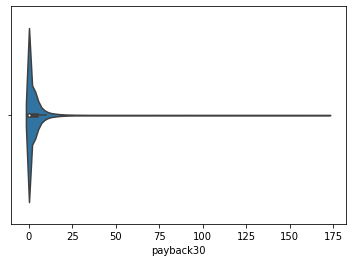

In [243]:
# Getting range for which loan amount paid back is more

sns.violinplot(x='payback30',data=data)

# from graph it is observed to be between 0-25

---

<b><h2> MODEL BUILDING 

In [244]:
# Importing the Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [247]:
X = data.drop(['label','pcircle','pdate'], axis=1)  
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [248]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


LogisticRegression()

In [249]:
y_pred=logreg.predict(X_test)

-------------

<h3><u> Confusion Matrix

In [250]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    0,  3013],
       [    0, 25012]], dtype=int64)

<b> Confusion Matrix Evaluation

In [251]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8924888492417484
Precision: 0.8924888492417484
Recall: 1.0


<h3> ROC Curve

plotingt true positive rate against the false positive rate.

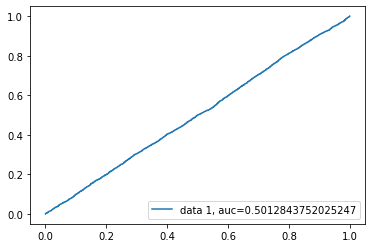

In [252]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()